In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
features = pd.read_csv('Credit_card.csv')
labels = pd.read_csv('Credit_card_label.csv')
df = pd.concat([features,labels['label']],axis=1)
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


#### Pre-processing

In [3]:
df = df.drop(['Ind_ID', 'Phone', 'Work_Phone', 'Mobile_phone', 'EMAIL_ID', 'Birthday_count'], axis=1)
df

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,365243,NaN,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-586,NaN,2,1
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-586,NaN,2,1
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-586,NaN,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-586,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-2182,Managers,2,0
1544,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-1209,Accountants,1,0
1545,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-2477,Managers,4,0
1546,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-645,Drivers,2,0


In [4]:
le = LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])
df['Car_Owner'] = le.fit_transform(df['Car_Owner'])
df['Propert_Owner'] = le.fit_transform(df['Propert_Owner'])
df['Type_Income'] = le.fit_transform(df['Type_Income'])
df['EDUCATION'] = le.fit_transform(df['EDUCATION'])
df['Marital_status'] = le.fit_transform(df['Marital_status'])
df['Housing_type'] = le.fit_transform(df['Housing_type'])
df['Type_Occupation'] = le.fit_transform(df['Type_Occupation'])
df

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Type_Occupation,Family_Members,label
0,1,1,1,0,180000.0,1,1,1,1,365243,18,2,1
1,0,1,0,0,315000.0,0,1,1,1,-586,18,2,1
2,0,1,0,0,315000.0,0,1,1,1,-586,18,2,1
3,0,1,0,0,NaN,0,1,1,1,-586,18,2,1
4,0,1,0,0,315000.0,0,1,1,1,-586,18,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0,0,1,0,NaN,0,1,1,1,-2182,10,2,0
1544,0,0,0,0,225000.0,0,2,3,1,-1209,0,1,0
1545,1,1,1,2,180000.0,3,1,1,1,-2477,10,4,0
1546,1,1,0,0,270000.0,3,4,0,1,-645,4,2,0


In [5]:
df.isna().sum()

GENDER              0
Car_Owner           0
Propert_Owner       0
CHILDREN            0
Annual_income      23
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Employed_days       0
Type_Occupation     0
Family_Members      0
label               0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Type_Occupation,Family_Members,label
0,1,1,1,0,180000.0,1,1,1,1,365243,18,2,1
1,0,1,0,0,315000.0,0,1,1,1,-586,18,2,1
2,0,1,0,0,315000.0,0,1,1,1,-586,18,2,1
3,0,1,0,0,315000.0,0,1,1,1,-586,18,2,1
4,2,1,0,0,315000.0,1,1,1,1,-586,18,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,1,1,0,1,360000.0,2,4,1,1,-3536,4,3,0
1521,0,0,0,0,225000.0,0,2,3,1,-1209,0,1,0
1522,1,1,1,2,180000.0,3,1,1,1,-2477,10,4,0
1523,1,1,0,0,270000.0,3,4,0,1,-645,4,2,0


In [7]:
sc = StandardScaler()
nor = Normalizer()
pca = PCA(n_components=5)
df_sc = sc.fit_transform(df.iloc[:, 0:12])
df_nor = nor.fit_transform(df_sc)
df_pca = pca.fit_transform(df_nor)
df_pca = pd.DataFrame(df_pca)
df2 = pd.concat([df_pca, df['label']], axis=1)
df2

[[ 0.18799966  0.81957716 -0.07289796 -0.18195901 -0.17387103]
 [ 0.04946219  0.64091029 -0.00458801  0.24095187  0.43655185]
 [ 0.04946219  0.64091029 -0.00458801  0.24095187  0.43655185]
 ...
 [-0.72041599  0.31211659  0.34461692 -0.15722967  0.01596435]
 [-0.64439273 -0.01400391 -0.34262737  0.35591367 -0.27043311]
 [-0.07920302  0.25010171 -0.02582811 -0.40657247  0.17049631]]


,0,1,2,3,4,label
0,0.188000,0.819577,-0.072898,-0.181959,-0.173871,1
1,0.049462,0.640910,-0.004588,0.240952,0.436552,1
2,0.049462,0.640910,-0.004588,0.240952,0.436552,1
3,0.049462,0.640910,-0.004588,0.240952,0.436552,1
4,-0.334899,0.699091,-0.342342,0.288183,0.017412,1
...,...,...,...,...,...,...
1520,-0.741109,0.217065,-0.115681,0.413567,-0.109852,0
1521,0.204205,-0.058621,-0.375928,0.169517,0.711110,0
1522,-0.720416,0.312117,0.344617,-0.157230,0.015964,0
1523,-0.644393,-0.014004,-0.342627,0.355914,-0.270433,0


#### Visualization

In [8]:
pca2 = PCA(n_components=2)
df_pca2 = pca2.fit_transform(df_nor)
df_vis = pd.DataFrame(df_pca2)
df_vis = pd.concat([df_vis, df['label']], axis=1)
df_vis

,0,1,label
0,0.188000,0.819577,1
1,0.049462,0.640910,1
2,0.049462,0.640910,1
3,0.049462,0.640910,1
4,-0.334899,0.699091,1
...,...,...,...
1520,-0.741109,0.217065,0
1521,0.204205,-0.058621,0
1522,-0.720416,0.312117,0
1523,-0.644393,-0.014004,0


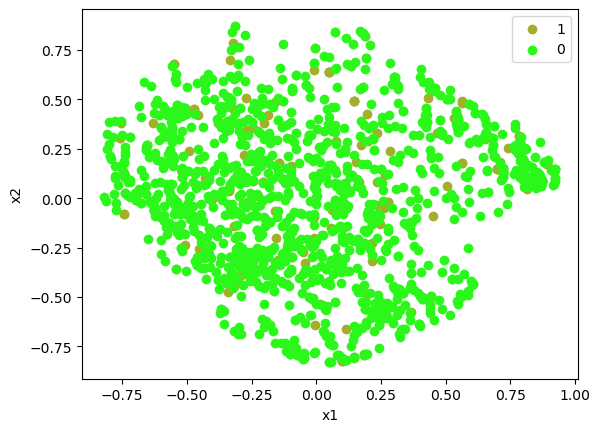

In [9]:
for i in df['label'].unique():
    color = np.array([[np.random.random(), np.random.random(), np.random.random()]])
    data = df_vis[df_vis[df_vis.columns[-1]]==i]
    p1 = plt.scatter(data[0], data[1], c=color, label=str(i))
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### Model

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df2.iloc[:, 0:5], df['label'], test_size=0.3, random_state=10)

In [11]:
svm = SVC()
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
accuracy_score(y_test, y_pred=svm_pred)

0.8908296943231441

In [12]:
rdf = RandomForestClassifier()
rdf.fit(x_train, y_train)
rdf_pred = rdf.predict(x_test)
accuracy_score(y_test, y_pred=rdf_pred)

0.8995633187772926

#### Model Analysis

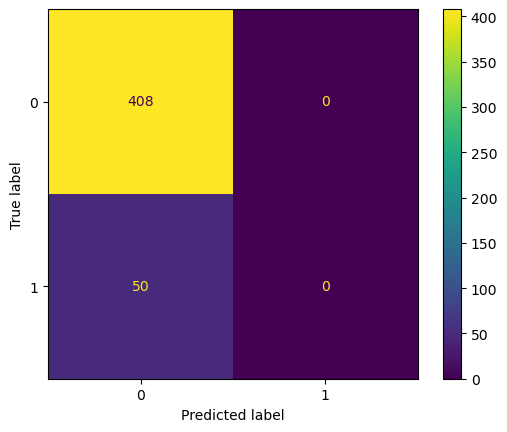

In [13]:
cm = confusion_matrix(y_test, svm_pred)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot()
plt.show()

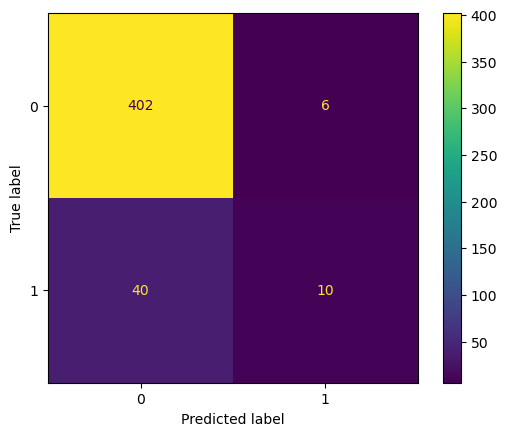

In [14]:
cm = confusion_matrix(y_test, rdf_pred)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot()
plt.show()